* n_samples=150
* n_features=2, 
* n_redundant=0, 
* n_informative=2,
* n_clusters_per_class=1, 
* random_state=3 -> Numero pseudo aleatorio (aconselhavel definir)
* class_sep=1.1 -> Distanciamento dos clasters
* n_classes=3 -> Numero de classes (tipos)

<IPython.core.display.Javascript object>


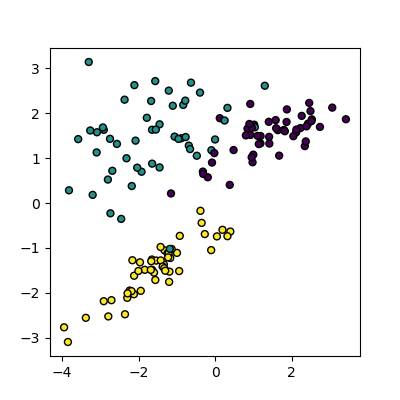

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
plt.figure(figsize=(4,4))
plt.subplot(111)
X1, Y1 = make_classification(n_samples=150, n_features=2, n_redundant=0, n_informative=2,
                            n_clusters_per_class=1, random_state=3, class_sep=1.5, n_classes=3)
plt.scatter(X1[:,0], X1[:,1], marker="o", c=Y1, s=25, edgecolor="k")
plt.show()


In [18]:
from sklearn.model_selection import train_test_split # Função de dividir dados de treino e teste
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors (classificação do vizinho mais próximo)
import numpy as np

knn = KNeighborsClassifier(n_neighbors = 3)
# n_eighbors = 1 -> Quantidade de vizinhos

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, random_state = 1)

# Transformando em teste
knn.fit(X_train, Y_train)

# Sabendo o quanto ele esta acertando
print("Treino = {}\n".format(knn.score(X_train, Y_train)))
print("Teste = {}\n".format(knn.score(X_test, Y_test)))

Treino = 0.9821428571428571

Teste = 0.9210526315789473



C:\Users\Inacio Raimundo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Inacio Raimundo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

C:\Users\Inacio Raimundo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<IPython.core.display.Javascript object>


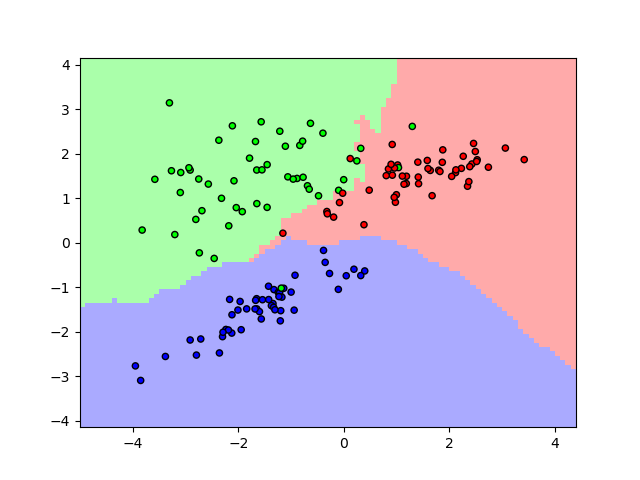

In [19]:
from matplotlib.colors import ListedColormap
x_min, x_max = X1[:,0].min() - 1, X1[:,0].max() + 1
y_min, y_max = X1[:,1].min() - 1, X1[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.scatter(X1[:,0], X1[:,1], c=Y1, cmap=cmap_bold, 
            edgecolor="k", s=20)
plt.show()